# The Reliability and Acceptance of Biometric System in Bangladesh: Users Perspective
Survey data analysis using puthon3

#### Researchers:
    Shaykh Siddique (shaykhsiddiqee@gmail.com)
    Mushfiqul Alam (alammushfiqul366@gmail.com)
    Monica Yasmin (y.monicamym@gmail.com)
    Tasnova Bintee Taher (tasnovafabi@gmail.com)
    
**Data Analyst By:**  *Shaykh Siddique*


In [1]:
# Survey data analysis using puthon3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataFile = pd.read_csv("datafinal.csv")
dataFile.head()

,Timestamp,Q0,Q1,Q2,Q3,Q4,Q5-FS,Q5-HS,Q5-IS,Q5-DNA,...,Q11-VD,Q12,Q13-UF,Q13-SS,Q13-P,Q13-E,Q14,Q15,Q16,Q17
0,2019/11/03 10:57:23 PM GMT+6,Yes,3.0,Agree,Agree,Strongly Disagree,Medium,Low,Very High,Very High,...,High,Strongly Agree,Often,Always,Always,Sometimes,4.0,Neutral,1.0,Agree
1,2019/11/03 10:57:47 PM GMT+6,Yes,5.0,Agree,Agree,Disagree,High,Low,High,High,...,Medium,Agree,Sometimes,Sometimes,Rarely,Sometimes,1.0,Neutral,5.0,Agree
2,2019/11/03 10:59:13 PM GMT+6,Yes,5.0,Agree,Agree,Agree,Low,Low,High,Very High,...,Medium,Agree,NaN,Always,Often,Sometimes,4.0,Disagree,3.0,Strongly Agree
3,2019/11/03 11:01:20 PM GMT+6,Yes,4.0,Strongly Agree,Disagree,Strongly Disagree,High,Medium,High,Very High,...,Low,Strongly Agree,Often,Always,Often,Often,2.0,Strongly Disagree,2.0,Strongly Agree
4,2019/11/03 11:02:18 PM GMT+6,Yes,4.0,Agree,Strongly Agree,Disagree,Low,Low,High,Very High,...,High,Agree,Always,Always,Often,Often,2.0,Agree,1.0,Agree


## Data Cleaning & Preaparaton
Question. Do you want to continue participating in this research study?

> Anasysis of response rate those wanted to continue research study. 

Drop all the no answering rows and missing variables are filled up with `NaN` (python Nan datatype - dataframe object).


In [3]:

totalResp = len(dataFile)
noResp = len(dataFile[dataFile["Q0"] == "No"])
yesResp = len(dataFile[dataFile["Q0"] == "Yes"])
print("Total Data length: "+str(totalResp))
print("Response Rate: "+str(yesResp*100/totalResp)+"%")

dataFile_cleand = dataFile.drop(dataFile[dataFile["Q0"] == "No"].index, axis=0)



Total Data length: 174
Response Rate: 98.85057471264368%


### Data Encoding
Ordinal Data are encoded in following encoded variables: 

| Variables  | Variables | Variables | Encoded Data   |
|------|------|------|------|
|   Strongly Disagree  |   Very Low | Never  | 1 |
|   Disagree  | Low  | Rarely  | 2 |
|   Neutral  | Medium  | Sometimes  | 3 |
|   Agree  | High  | Often  | 4 |
|   Strongly Agree  |  Very High  | Always  | 5 |

In [4]:
# for Q1. How frequently do you use the biometric authentication system?
# 1 =never and 5 = always skip all the never answers
dataFile_cleand = dataFile.drop(dataFile[dataFile["Q1"] == 1].index, axis=0)

# for Q2. Do you think it is possible to steal your biometric data from these kinds of services(Personal Devices or Online Banks/NID/Mobile Phone Companies)?
# aggree and disaggree, if any person skip this answer it will be consider as neutral

dataFile_cleand = dataFile_cleand.replace("Strongly Disagree", 1)
dataFile_cleand = dataFile_cleand.replace("Disagree", 2)
dataFile_cleand = dataFile_cleand.replace("Neutral", 3)
dataFile_cleand = dataFile_cleand.replace("Agree", 4)
dataFile_cleand = dataFile_cleand.replace("Strongly Agree", 5)
# for Q5. For this case, rate the biometric systems which are more reliable
# Q5-FS	Q5-HS	Q5-IS	Q5-DNA	Q5-SV	Q5-VD
dataFile_cleand = dataFile_cleand.replace("Very Low",1)
dataFile_cleand = dataFile_cleand.replace("Low",2)
dataFile_cleand = dataFile_cleand.replace("Medium",3)
dataFile_cleand = dataFile_cleand.replace("High",4)
dataFile_cleand = dataFile_cleand.replace("Very High",5)

# for Q13. Do you ever use any third-party applications that need/store biometric information?
# never often always
dataFile_cleand = dataFile_cleand.replace("Never",1)
dataFile_cleand = dataFile_cleand.replace("Rarely",2)
dataFile_cleand = dataFile_cleand.replace("Sometimes",3)
dataFile_cleand = dataFile_cleand.replace("Often",4)
dataFile_cleand = dataFile_cleand.replace("Always",5)

dataFile_cleand.head()

,Timestamp,Q0,Q1,Q2,Q3,Q4,Q5-FS,Q5-HS,Q5-IS,Q5-DNA,...,Q11-VD,Q12,Q13-UF,Q13-SS,Q13-P,Q13-E,Q14,Q15,Q16,Q17
0,2019/11/03 10:57:23 PM GMT+6,Yes,3.0,4.0,4.0,1.0,3.0,2.0,5.0,5.0,...,4.0,5.0,4.0,5.0,5.0,3.0,4.0,3.0,1.0,4.0
1,2019/11/03 10:57:47 PM GMT+6,Yes,5.0,4.0,4.0,2.0,4.0,2.0,4.0,4.0,...,3.0,4.0,3.0,3.0,2.0,3.0,1.0,3.0,5.0,4.0
2,2019/11/03 10:59:13 PM GMT+6,Yes,5.0,4.0,4.0,4.0,2.0,2.0,4.0,5.0,...,3.0,4.0,NaN,5.0,4.0,3.0,4.0,2.0,3.0,5.0
3,2019/11/03 11:01:20 PM GMT+6,Yes,4.0,5.0,2.0,1.0,4.0,3.0,4.0,5.0,...,2.0,5.0,4.0,5.0,4.0,4.0,2.0,1.0,2.0,5.0
4,2019/11/03 11:02:18 PM GMT+6,Yes,4.0,4.0,5.0,2.0,2.0,2.0,4.0,5.0,...,4.0,4.0,5.0,5.0,4.0,4.0,2.0,4.0,1.0,4.0


## This part of analysis will fullfill objective 1
> **Objective:** To analyze user reviews about the quality and reliability of biometric systems.

Three main question analysis

- **Q17.** Do you think instead of using a password/pin based security system, the biometric system can give more security to users?
- **Q5.** The biometric system works on body measurement. If anything goes wrong with your skin, voice or physical any injury biometric system cannot verify you. In that case rate the system reliability
- **Q10.** What are the most common issues you faced?

#### 1.1 Satisfiction Comparison between Password/Pin and Biometric  Authentication
Positive replies of this question are considerated as vote for Biometric  Authentication and negetives are for Password or Pin based authentication system.
In Total Participants of `174`(will update for final dataset), 98 users voted for biometric system and  16 users chooses choosed password/pin based system.
Parcentage for biometric system $= \frac{98*100}{174} $

percentage of password/pin, neutal and Biometric system: [10.32258064516129, 26.451612903225808, 63.225806451612904]


Text(0.5, 1.0, 'Satisfiction rate on password/pin vs biometric system')

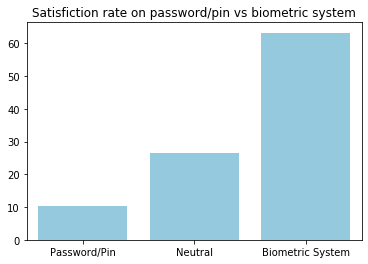

In [5]:
# analysis of Q17
# biometric - 4+5, pass- 1+2, neutral-3
graphQ17= []
# making parcentage of votes
graphQ17.append((len(dataFile_cleand[dataFile_cleand["Q17"] < 3]) * 100)/dataFile_cleand["Q17"].count())
graphQ17.append((len(dataFile_cleand[dataFile_cleand["Q17"] == 3]) * 100)/dataFile_cleand["Q17"].count())
graphQ17.append((len(dataFile_cleand[dataFile_cleand["Q17"] > 3]) * 100)/dataFile_cleand["Q17"].count())
graphQ17.sort()
print("percentage of password/pin, neutal and Biometric system:", graphQ17)

# plotting codes goes here
xticks=[1, 2, 3]
grpQ17 =sns.barplot(y = graphQ17, x=xticks, color="skyblue")

grpQ17.set_xticklabels(["Password/Pin", "Neutral", "Biometric System"])
grpQ17.set_title("Satisfiction rate on password/pin vs biometric system")

#### 1.2 Reliability Ratings for Different Biometric Systems
Calculate the sum of values(1-5) for each answer. As encoded method `very Low = 1` and `very high = 5`, if summation of score increase, the overall score will be also increase. Then the percentage will be the final score for each biometric systems. So

$$score_{(i)} = \frac{\sum point_{j} *100}{Total Score} $$

Where, 

$i$ for each biometric system

$j$ is for each record and 

$ Total Score = Total Participantes * 5 $

> The most reliable biometric system is DNA identification according to the participants review 68.67 %. Then iris and fingerprint verification. Signature validation and voice detection are not so much reliable to users(score % is below 50).


Values:  [58.23899371069182, 48.80503144654088, 62.893081761006286, 68.67924528301887, 44.0251572327044, 44.528301886792455]


Text(0.5, 1.0, 'Reliability rate of different biometric systems')

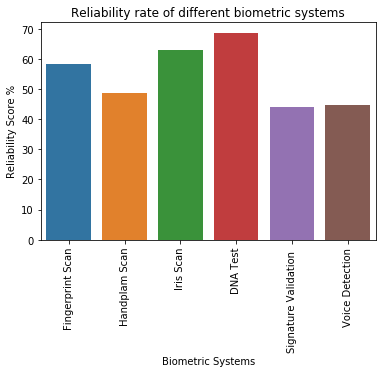

In [6]:
# analysis of Q5

qtn_tit = ["Q5-FS", "Q5-HS", "Q5-IS", "Q5-DNA", "Q5-SV", "Q5-VD"]

# for val in qtn_tit

totalScore = len(dataFile_cleand) * 5
totalrespQ5 = []
for j, val in enumerate(qtn_tit):
    totalrespQ5.append((dataFile_cleand[val].sum()*100)/totalScore)

print("Values: ", totalrespQ5)
xticks = [0, 1, 2, 3, 4, 5]
graphQ5sc = sns.barplot(x = xticks, y = totalrespQ5)

graphQ5sc.set_xticks(xticks)
graphQ5sc.set_xticklabels(["Fingerprint Scan", "Handplam Scan", "Iris Scan", "DNA Test", "Signature Validation ", "Voice Detection"], rotation = 90)
graphQ5sc.set(xlabel='Biometric Systems', ylabel='Reliability Score %')
graphQ5sc.set_title("Reliability rate of different biometric systems")

####  1.3 Major Issues of Biometric System
This heatmap is build by crosschecking of major issues biomatric system and how frequently they face that kind of issues.
From the figure we can easily find out-
- How many of people faced 
- Which kind of issus
- How frequent they faced.


values: [[16, 36, 66, 20, 6], [9, 45, 51, 28, 7], [13, 34, 55, 30, 12], [14, 29, 64, 27, 10], [25, 29, 41, 13, 4]]


Text(0.5, 1, 'Major issues of Biometric Systems')

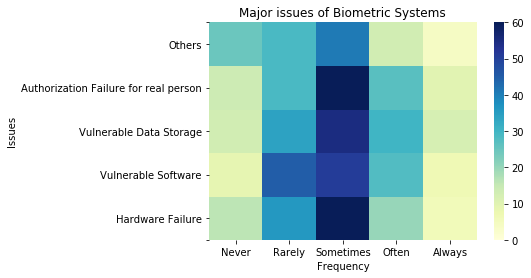

In [7]:
# analysis of Q10
# Q10-HF	Q10-VS	Q10-VDS	Q10-AF	Q10-O
Q10ttl = ["Q10-HF", "Q10-VS", "Q10-VDS", "Q10-AF", "Q10-O"]
issuesCrosscheck = [[]]
for j, val in enumerate(Q10ttl):
    if j:
        issuesCrosscheck.append([])
    for i in range(0,5):
        issuesCrosscheck[j].append(len(dataFile_cleand[dataFile_cleand[val] == i+1]))
    
print("values:", issuesCrosscheck)
graphQ10 = sns.heatmap(issuesCrosscheck, vmin=0, vmax=60, cmap="YlGnBu")  
xticks = [0.5, 1.5, 2.5, 3.5, 4.5]
yticks = [0, 0.5, 1.5, 2.5, 3.5, 4.5, 5]
graphQ10.set_xticks(xticks)
graphQ10.set_yticks(yticks)
graphQ10.invert_yaxis()
graphQ10.set_xticklabels(["Never", "Rarely", "Sometimes", "Often", "Always"])
graphQ10.set_yticklabels(["","Hardware Failure", "Vulnerable Software", "Vulnerable Data Storage", "Authorization Failure for real person", "Others"],  rotation = 0)
graphQ10.set(ylabel='Issues', xlabel='Frequency')
graphQ10.set_title("Major issues of Biometric Systems")

## This part of analysis will fullfill objective 2
>  **Objective:** To assess user concerns about biometric data privacy.

Some questions:
- **Q7.** In Sic-fiction movies, we see the thief took the victim’s fingerprints or make the victim unconscious and collect biometric information. Do you think it’s possible in real life?
- **Q6.** If any reason, you are failed to access the biometric security system what kind of secondary mechanism (recovery option) you prefer to use?
- **Q14.** Do you ever use any third-party applications that need/store biometric information?
- **Q15.** and Q16. Do you think all kinds of biometric systems have well-defined Terms and Conditions?

#### 2.1 Awareness about fake authentication of Biometric System
Given an imaginary scenario and asked, whether it is possible or not in real life ?
Need good referance on Internet to prove really it's possible or not. 
Example link: https://www.computerworld.com.au/article/627662/scientists-give-biometric-security-systems-fake-finger/
- Here said - Researchers have fabricated a wearable fake fingertip that is able to fool biometric security systems(Try to find their paper that will be the best process).
- Find one more referance(Optional).
- Then finally say as some study reflects that it is possible to fool a biometric system, so the positive awareness rate is 36.4% .

Text(0.5, 1.0, 'Awareness about fake authentication of Biometric System')

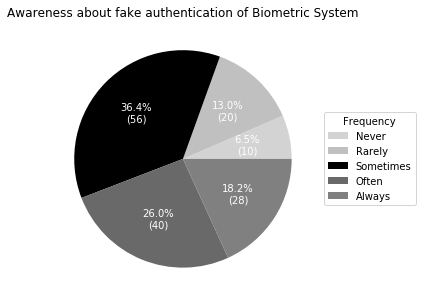

In [14]:
# analysis of Q7 and Q 14 will decscribe together

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)
# sum of tolat response
arr_total=[]
for i in range(1,6):
    arr_total.append(len(dataFile_cleand[dataFile_cleand["Q7"] == i]))
    
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(aspect="equal"))    

wedges, texts, autotexts = ax.pie(arr_total, colors=["lightgrey", "silver", "black", "dimgrey", "grey"],autopct=lambda pct: func(pct, arr_total), textprops=dict(color="W"))
ingredients = ["Never", "Rarely", "Sometimes", "Often", "Always"]
ax.legend(wedges, ingredients, title="Frequency", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title("Awareness about fake authentication of Biometric System")

#### 2.2 Concern about secondary recovery mechanisms
If anyone failed to access biometric system for physical injury, then what were the secondary mechanisms (recovery options) usually they used.
Among total participants `174`, 46 people were using recovery email or message, 40 people were using password/pin. 2 participants had no secondary recovery mechanisms and 19 participants ignored this question(Both are taken as they are not familiar with secondary recovery mechanisms).


Total Response for this question:  155
['Recovery Email or Message', 'Password or Pin', 'Multi-Biometric Authentication', 'None'] Consecutive Response: [46, 40, 25, 2]


Text(0.5, 1.0, 'Concern about secondary recovery mechanisms')

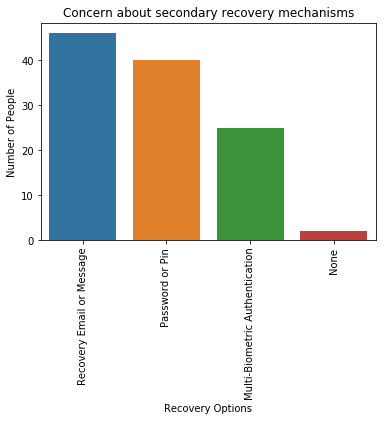

In [9]:
# analysis of Q6

factarr = ["Recovery Email or Message", "Password or Pin", "Multi-Biometric Authentication", "None"]
totalQ6group =[]
for val in factarr:
    totalQ6group.append(len(dataFile_cleand[dataFile_cleand["Q6"] == val]))
print("Total Response for this question: ", dataFile_cleand["Q6"].count())
print(factarr,"Consecutive Response:" ,totalQ6group)
graphQ6 = sns.barplot(y=totalQ6group, x=factarr)
graphQ6.set_xticklabels(factarr, rotation=90)
graphQ6.set(xlabel='Recovery Options', ylabel='Number of People')
graphQ6.set_title("Concern about secondary recovery mechanisms")

#### 2.3 Third-Party Software users that collects biometric information
Descriptions are shown in **Pie chart**.

values [59, 29, 35, 24, 7]


Text(0.5, 1.0, 'Third-Party Software users that collects biometric information')

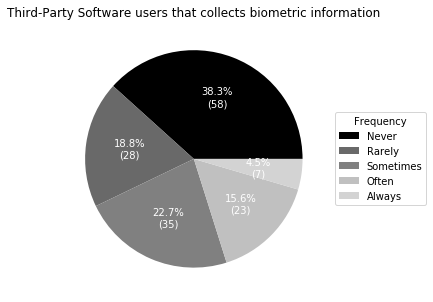

In [10]:
# qstn 14 analysis
arr_totalQ14=[]
for i in range(1,6):
    arr_totalQ14.append(len(dataFile_cleand[dataFile_cleand["Q14"] == i]))
    
print("values", arr_totalQ14)
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(arr_totalQ14, colors=["black", "dimgrey", "grey", "silver", "lightgrey"],autopct=lambda pct: func(pct, arr_total), textprops=dict(color="W"))
ingredients = ["Never", "Rarely", "Sometimes", "Often", "Always"]
ax.legend(wedges, ingredients, title="Frequency", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title("Third-Party Software users that collects biometric information")

#### 2.4 Concerns about Documentation/ Biometric Device  
For more details check google form data visualization part. From the percentile 25% of tolal participants donot read Documentation/Terms and Conditions before using a biometric device.

In [11]:
dataFile_cleand[["Q15", "Q16"]].describe()

,Q15,Q16
count,154.000000,156.000000
mean,2.941558,2.698718
std,0.834211,1.287257
min,1.000000,1.000000
25%,2.250000,2.000000
50%,3.000000,3.000000
75%,3.000000,4.000000
max,5.000000,5.000000


## This part of analysis will fullfill objective 3
> **Objective:** To compare different biometric systems based on users' perspectives.

**Related question:**
- **Q3 & Q4.** Comparison of Personal Biometric Device Authentication vs Shared Data Storage(NID, Telecommunication Industry, Online Banking data center) privilege of update/modify/remove.
- **Major Analysis(Q5, Q8, Q11, Price)** - Two dimensional comparison matrix of different biometric system.


#### 3.1 Personal vs Shared Biometric Data Storage (Privileges of update/modify/remove)

From the encoded mean & median, personal device have enough privileges to update/modify/remove biometric information. For shared data storage privilege mean & median are less than 3(neutral). So the users donot think they have enough privileges for govt. or other corporate biometric data storages.

In [12]:

p_prev_med, p_prev_mean, p_prev_std = dataFile_cleand["Q3"].median(), dataFile_cleand["Q3"].mean(), dataFile_cleand["Q3"].std()
s_prev_med, s_prev_mean, s_prev_std = dataFile_cleand["Q4"].median(), dataFile_cleand["Q4"].mean(), dataFile_cleand["Q4"].std()

print("\t Persional device | Shared Data Storage privilege")
print("Mean:\t "+ str(p_prev_mean)[:4] + " \t\t  |\t\t"+str(s_prev_mean)[:4])
print("Median:\t "+ str(p_prev_med) + " \t\t  |\t\t" + str(s_prev_med))
print("Std :\t "+ str(p_prev_std)[:4] + " \t\t  |\t\t" + str(s_prev_std)[:4])

	 Persional device | Shared Data Storage privilege
Mean:	 3.35 		  |		2.56
Median:	 4.0 		  |		2.0
Std :	 0.99 		  |		0.94


#### Two Dimensional Comparison Matrix

Values:  [49.18238993710692, 61.63522012578616, 46.289308176100626, 60.62893081761006, 59.874213836477985, 43.144654088050316, 43.270440251572325]


Text(0.5, 1.0, 'Different biometric system with user preference')

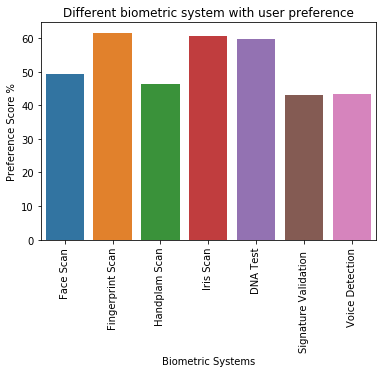

In [13]:
# analysis of Q8

qtn_tit = ["Q8-FD", "Q8-FS", "Q8-HS", "Q8-IS", "Q8-DNA", "Q8-SV", "Q8-VD"]

# for val in qtn_tit

totalScore = len(dataFile_cleand) * 5
totalrespQ8 = []
for j, val in enumerate(qtn_tit):
    totalrespQ8.append((dataFile_cleand[val].sum()*100)/totalScore)

print("Values: ", totalrespQ8)
xticks = [0, 1, 2, 3, 4, 5, 6]
graphQ8sc = sns.barplot(x = xticks, y = totalrespQ8)

graphQ8sc.set_xticks(xticks)
graphQ8sc.set_xticklabels(["Face Scan", "Fingerprint Scan", "Handplam Scan", "Iris Scan", "DNA Test", "Signature Validation ", "Voice Detection"], rotation = 90)
graphQ8sc.set(xlabel='Biometric Systems', ylabel='Preference Score %')
graphQ8sc.set_title("Different biometric system with user preference")